In [167]:
#import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

pd.set_option('display.max_rows', 250)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 30)

In [127]:
df = pd.read_csv('df_for_preprocessing.csv')

In [128]:
df.shape

(14999, 24)

In [129]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,high performance,high,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,high performance,medium,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [130]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'dept', 'salary', 'sat_level_cluster',
       'last_eval_cluster', 'avg_month_hr_cluster',
       'satisfaction_level^1xlast_evaluation^1',
       'satisfaction_level^1xnumber_project^1',
       'satisfaction_level^1xaverage_montly_hours^1',
       'satisfaction_level^1xtime_spend_company^1',
       'last_evaluation^1xnumber_project^1',
       'last_evaluation^1xaverage_montly_hours^1',
       'last_evaluation^1xtime_spend_company^1',
       'number_project^1xaverage_montly_hours^1',
       'number_project^1xtime_spend_company^1',
       'average_montly_hours^1xtime_spend_company^1'],
      dtype='object')

In [131]:
#https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689

#For personal purposes

useless_var = ['id']

nominal_var = ['dept',
               'salary',
               'sat_level_cluster',
               'last_eval_cluster',
               'avg_month_hr_cluster']

binary_var = ['Work_accident',
              'promotion_last_5years']

target_var = ['churn']

time_var = []

count_var = ['number_project',
             'time_spend_company']

interval_var = ['satisfaction_level',
                'last_evaluation',
                'average_montly_hours',
                'satisfaction_level^1xlast_evaluation^1',
                'satisfaction_level^1xnumber_project^1',
                'satisfaction_level^1xaverage_montly_hours^1',
                'satisfaction_level^1xtime_spend_company^1',
                'last_evaluation^1xnumber_project^1',
                'last_evaluation^1xaverage_montly_hours^1',
                'last_evaluation^1xtime_spend_company^1',
                'number_project^1xaverage_montly_hours^1',
                'number_project^1xtime_spend_company^1',
                'average_montly_hours^1xtime_spend_company^1']

## Transform the data

In [132]:
num_var = count_var + interval_var

In [133]:
nominal_transformer = OneHotEncoder([['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'],
                                    ['low', 'medium', 'high'],
                                    ['unsatisfied', 'very satisfied', 'very unsatisfied', 'satisfied'],
                                    ['low performance', 'high performance', 'very high performance',
       'average performance'],
                                    ['low', 'high', 'medium']
                                    ])

num_transformer = StandardScaler()

In [134]:
preprocessor = ColumnTransformer(transformers = [
                                                ('scaler', num_transformer, num_var),
                                                ('onehot', nominal_transformer, nominal_var)
                                                ],
                                remainder = 'passthrough')

In [135]:
# Assign variables
X = df[num_var + nominal_var + binary_var]
y = df[target_var]

# Then split the remaining into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [136]:
X_train.head()

,number_project,time_spend_company,satisfaction_level,last_evaluation,average_montly_hours,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,Work_accident,promotion_last_5years
12602,7,4,0.10,0.84,250,0.0840,0.70,25.00,0.40,5.88,210.00,3.36,1750.0,28.0,1000.0,product_mng,low,very unsatisfied,high performance,high,0,0
4889,4,3,0.57,0.68,154,0.3876,2.28,87.78,1.71,2.72,104.72,2.04,616.0,12.0,462.0,management,medium,satisfied,average performance,low,1,0
1572,2,3,0.39,0.48,154,0.1872,0.78,60.06,1.17,0.96,73.92,1.44,308.0,6.0,462.0,technical,low,unsatisfied,low performance,low,0,0
13375,4,4,0.91,0.68,132,0.6188,3.64,120.12,3.64,2.72,89.76,2.72,528.0,16.0,528.0,IT,medium,very satisfied,average performance,low,0,0
879,5,5,0.82,0.97,263,0.7954,4.10,215.66,4.10,4.85,255.11,4.85,1315.0,25.0,1315.0,technical,medium,very satisfied,very high performance,high,0,0


In [137]:
# Fitting the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the input validation and test sets
X_test_transformed = preprocessor.transform(X_test)

In [138]:
# why we name the transformers
preprocessor.named_transformers_.keys()

dict_keys(['scaler', 'onehot', 'remainder'])

## Put all the transformed X data back into a dataframe

In [139]:
preprocessor.named_transformers_

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'onehot': OneHotEncoder(categories=[['sales', 'accounting', 'hr', 'technical', 'support',
                            'management', 'IT', 'product_mng', 'marketing',
                            'RandD'],
                           ['low', 'medium', 'high'],
                           ['unsatisfied', 'very satisfied', 'very unsatisfied',
                            'satisfied'],
                           ['low performance', 'high performance',
                            'very high performance', 'average performance'],
                           ['low', 'high', 'medium']],
               drop=None, dtype=<class 'numpy.float64'>, handle_unknown='error',
               sparse=True),
 'remainder': 'passthrough'}

In [140]:
#Grab the column names for all of our nominal variables
one_hot_columns = preprocessor.named_transformers_.onehot.get_feature_names()

In [141]:
transformed_columns = num_var + list(one_hot_columns) + binary_var

In [142]:
len(transformed_columns)

41

In [143]:
X_train_transformed.shape # Great! They match

(10499, 41)

In [144]:
X_train_transform_df = pd.DataFrame(X_train_transformed, columns = transformed_columns)
X_test_transform_df = pd.DataFrame(X_test_transformed, columns = transformed_columns)

In [155]:
classifiers = [
    LogisticRegression(penalty = 'l1', solver='saga', class_weight='balanced',random_state=42, C=1),
    #SVC(kernel="rbf", C=0.025, random_state=42, probability=True, class_weight='balanced'),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    DecisionTreeRegressor(random_state=42),
    #VotingClassifier(random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    xgb.XGBClassifier(scale_pos_weight=3.2,verbosity=0,random_state=42),
    CatBoostClassifier(class_weights=[1,3.2],verbose=False,random_seed=42)
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_transform_df, y_train)
    print(f'*****{classifier}*****')
    print(classification_report(y_train,pipe.predict(X_train_transform_df)))
    print(classification_report(y_test,pipe.predict(X_test_transform_df)))
    #print("model recall score: %.3f" % pipe.score(X_test_transform_df, y_test))

*****LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)*****
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8000
           1       0.79      0.92      0.85      2499

    accuracy                           0.92     10499
   macro avg       0.88      0.92      0.90     10499
weighted avg       0.93      0.92      0.93     10499

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3428
           1       0.77      0.90      0.83      1072

    accuracy                           0.91      4500
   macro avg       0.87      0.91      0.89      4500
weighted avg       0.92      0.91      0.91      4500

*****Deci

In this case, we want to minimize the number of FN (Employees who are incorrectly predicted to not churn; they were actually supposed to churn), so we want a better recall score.

In [156]:
X = df[num_var + nominal_var + binary_var]
y = df[target_var]

cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(X,
                                                                    y,
                                                                    random_state=42)

In [157]:
cat_X_train.head()

,number_project,time_spend_company,satisfaction_level,last_evaluation,average_montly_hours,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,Work_accident,promotion_last_5years
14480,6,6,0.38,0.86,139,0.3268,2.28,52.82,2.28,5.16,119.54,5.16,834.0,36.0,834.0,technical,medium,unsatisfied,high performance,low,0,0
1934,4,5,0.78,0.93,225,0.7254,3.12,175.50,3.90,3.72,209.25,4.65,900.0,20.0,1125.0,sales,medium,satisfied,very high performance,medium,0,0
7900,5,3,0.56,0.71,243,0.3976,2.80,136.08,1.68,3.55,172.53,2.13,1215.0,15.0,729.0,technical,medium,unsatisfied,average performance,high,0,0
2952,4,2,0.96,0.62,217,0.5952,3.84,208.32,1.92,2.48,134.54,1.24,868.0,8.0,434.0,support,medium,very satisfied,average performance,medium,0,0
4367,3,4,0.83,0.53,211,0.4399,2.49,175.13,3.32,1.59,111.83,2.12,633.0,12.0,844.0,sales,low,very satisfied,low performance,medium,1,0


In [158]:
# Set up categorical columns
cat_columns = ['dept',
               'salary',
               'sat_level_cluster',
               'last_eval_cluster',
               'avg_month_hr_cluster',
               'Work_accident',
               'promotion_last_5years']

In [159]:
from catboost import Pool

In [160]:
# Setting up pools
# cat_features can be column names if data is df, or indicies of the column if in numpy array/df

train_pool = Pool(cat_X_train,
                  cat_y_train,
                  cat_features=cat_columns)

test_pool = Pool(cat_X_test,
                  cat_y_test,
                  cat_features=cat_columns)

In [164]:
cb_model = CatBoostClassifier(random_seed=42, verbose=False)
cb_model_2 = CatBoostClassifier(class_weights=[1,3.2],verbose=False,random_seed=42)


In [162]:
cb_model.fit(train_pool,
             eval_set=test_pool
             #logging_level = 'Verbose',
            )

In [165]:
cb_model_2.fit(train_pool,
               eval_set=test_pool)

In [163]:
print(classification_report(cat_y_train,cb_model.predict(cat_X_train)))
print(classification_report(cat_y_test,cb_model.predict(cat_X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8575
           1       1.00      0.99      0.99      2674

    accuracy                           1.00     11249
   macro avg       1.00      0.99      1.00     11249
weighted avg       1.00      1.00      1.00     11249

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2853
           1       0.99      0.97      0.98       897

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



In [166]:
print(classification_report(cat_y_train,cb_model_2.predict(cat_X_train)))
print(classification_report(cat_y_test,cb_model_2.predict(cat_X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8575
           1       0.99      1.00      0.99      2674

    accuracy                           1.00     11249
   macro avg       1.00      1.00      1.00     11249
weighted avg       1.00      1.00      1.00     11249

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2853
           1       0.98      0.97      0.97       897

    accuracy                           0.99      3750
   macro avg       0.98      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



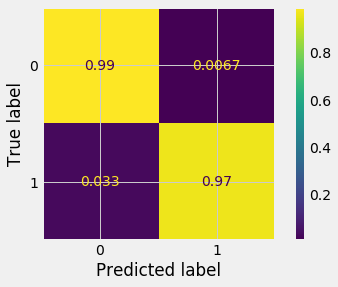

In [168]:
plot_confusion_matrix(cb_model_2, cat_X_test, cat_y_test, normalize='true')

In [170]:
pipe.named_steps

{'classifier': <catboost.core.CatBoostClassifier at 0x7f353beae828>}